<a href="https://colab.research.google.com/github/akib1162100/ML_base/blob/main/ML_intro_asg_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install keras
!pip3 install tensorflow

#Data Analysis and Preprocessing

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
ecommerce_raw = pd.read_csv('ecommerce_data.csv')

In [83]:
ecommerce_raw.head(10)

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase
5,1021,2023-01-06,12,Books,369.471757,1,Add to Cart
6,1083,2023-01-07,19,Home,156.727320,1,View
7,1087,2023-01-08,10,Books,95.005236,2,Add to Cart
8,1075,2023-01-09,9,Electronics,322.401100,3,Purchase
9,1075,2023-01-10,5,Books,253.121528,1,View


**Cleaning Category** data and fill it with similar productID's category

In [84]:
ecommerce_raw.describe()

,CustomerID,ProductID,Price,Quantity
count,1000.000000,1000.000000,900.000000,1000.000000
mean,1050.128000,10.338000,257.705579,2.975000
std,29.573505,5.771921,144.306057,1.414346
min,1001.000000,1.000000,10.092316,1.000000
25%,1024.000000,5.000000,130.849891,2.000000
50%,1051.000000,10.000000,266.021046,3.000000
75%,1075.000000,15.000000,382.361857,4.000000
max,1100.000000,20.000000,499.859764,5.000000


In [85]:
ecommerce_raw['Category'].describe()

count          900
unique           4
top       Clothing
freq           239
Name: Category, dtype: object

In [86]:
product_category_map = ecommerce_raw.dropna(subset=['Category']).drop_duplicates(subset=['ProductID'])[['ProductID', 'Category']]
ecommerce_raw['Category'] = ecommerce_raw['Category'].fillna(ecommerce_raw['ProductID'].map(product_category_map.set_index('ProductID')['Category']))

In [87]:
ecommerce_raw['Category'].isna().any()

False

**Handeling Price data**

In [88]:
ecommerce_raw['Price'].describe()

count    900.000000
mean     257.705579
std      144.306057
min       10.092316
25%      130.849891
50%      266.021046
75%      382.361857
max      499.859764
Name: Price, dtype: float64

In [89]:
product_price_map = ecommerce_raw.dropna(subset=['Price']).drop_duplicates(subset=['ProductID'])[['ProductID', 'Price']]
ecommerce_raw['Price'] = ecommerce_raw['Price'].fillna(ecommerce_raw['ProductID'].map(product_price_map.set_index('ProductID')['Price']))

In [90]:
ecommerce_raw['Price'].isna().any()

False

Analyze customer interactions

In [91]:
len(ecommerce_raw['CustomerID'].unique())

100

In [92]:
customer_interaction_counts = ecommerce_raw.groupby('CustomerID')['Action'].count().reset_index()
customer_interaction_counts.rename(columns={'Action': 'TotalActions'}, inplace=True)
most_active_customer = customer_interaction_counts.loc[customer_interaction_counts['TotalActions'].idxmax()]

In [93]:
most_active_customer

CustomerID      1090
TotalActions      20
Name: 89, dtype: int64

#Feature Engineering and Analysis

Adding total cost column

In [94]:
ecommerce_raw['TotalSpent'] = ecommerce_raw["Price"]*ecommerce_raw["Quantity"]
ecommerce_raw['TotalSpent'].describe()

count    1000.000000
mean      780.415309
std       609.350831
min        16.031754
25%       270.824383
50%       628.384363
75%      1188.000571
max      2479.769412
Name: TotalSpent, dtype: float64

In [95]:
grouped = ecommerce_raw.groupby('CustomerID')
quantity_per_customer = grouped['Quantity'].sum()

In [96]:
cost_per_customer =  grouped['TotalSpent'].sum()
average_cost_per_customer = grouped['TotalSpent'].mean()

In [97]:
potential_valuable_customer = cost_per_customer.loc[cost_per_customer.idxmax()]
cost_per_customer.idxmax(),potential_valuable_customer

(1033, 18925.87592525675)

In [98]:
potential_loyal_valuable_per_customer = average_cost_per_customer.loc[average_cost_per_customer.idxmax()]
average_cost_per_customer.idxmax(),potential_loyal_valuable_per_customer

(1031, 1342.445784569565)

Filter By purchase action

In [99]:
only_purchase=ecommerce_raw[ecommerce_raw['Action'] == 'Purchase']
grouped_OP = only_purchase.groupby('CustomerID')

In [100]:
cost_per_customer_OP =  grouped_OP['TotalSpent'].sum()
average_cost_per_customer_OP = grouped_OP['TotalSpent'].mean()

In [101]:
valuable_customer_OP = cost_per_customer_OP.loc[cost_per_customer_OP.idxmax()]
cost_per_customer_OP.idxmax(),valuable_customer_OP

(1092, 12070.523164409913)

In [102]:
loyal_valuable_per_customer_OP = average_cost_per_customer_OP.loc[average_cost_per_customer_OP.idxmax()]
average_cost_per_customer_OP.idxmax(),loyal_valuable_per_customer_OP

(1055, 1759.502876379902)

In [103]:
category_counts = ecommerce_raw['Category'].value_counts()
print(f"most interacted category is {category_counts.idxmax()} and it's value is {category_counts.loc[category_counts.idxmax()]}")

most interacted category is Clothing and it's value is 265


In [104]:
grouped_caegory = ecommerce_raw.groupby('Category')
price_category=grouped_caegory['Price'].sum()
print(f"most potential profitable category is {price_category.idxmax()} and it's value is {price_category.loc[price_category.idxmax()]}")

most potential profitable category is Electronics and it's value is 69575.62098416802


In [105]:
grouped_caegory_purchase = only_purchase.groupby('Category')
price_category_purchased=grouped_caegory_purchase['Price'].sum()
print(f"most pricy category is {price_category_purchased.idxmax()} and it's value is {price_category_purchased.loc[price_category_purchased.idxmax()]}")

most pricy category is Electronics and it's value is 64283.52246876549


In [106]:
cross_table = pd.crosstab(ecommerce_raw['Category'], ecommerce_raw['Action'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Books'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Home')])

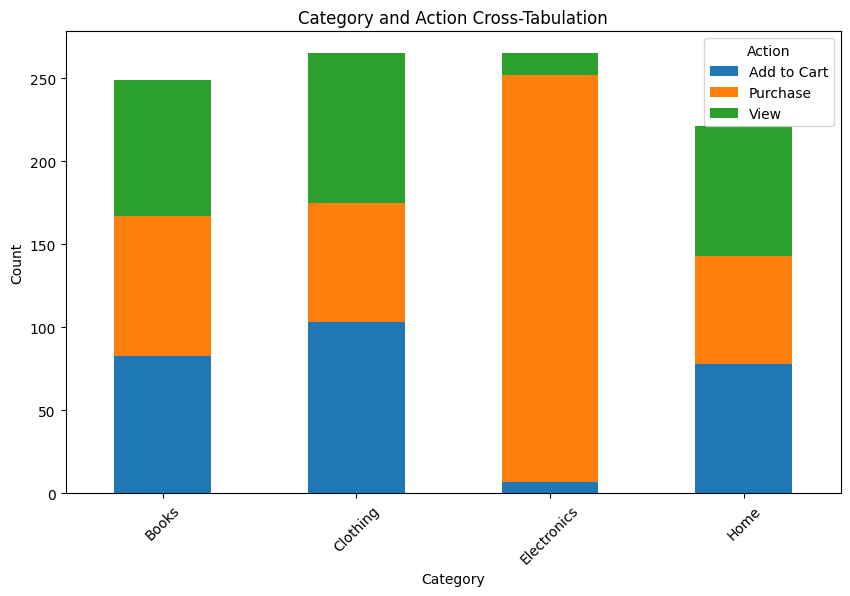

In [107]:
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Category and Action Cross-Tabulation')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Machine Learning Preprocessing

In [108]:
df_encoded = pd.get_dummies(ecommerce_raw, columns=['Category', 'Action'])

In [109]:
df_encoded.head(10)

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Books,Category_Clothing,Category_Electronics,Category_Home,Action_Add to Cart,Action_Purchase,Action_View
0,1052,2023-01-01,2,125.570224,2,251.140447,0,1,0,0,1,0,0
1,1093,2023-01-02,15,191.996781,3,575.990343,0,1,0,0,1,0,0
2,1015,2023-01-03,8,40.645691,1,40.645691,0,1,0,0,1,0,0
3,1072,2023-01-04,8,40.645691,2,81.291382,0,1,0,0,0,0,1
4,1061,2023-01-05,17,319.273617,5,1596.368083,0,0,1,0,0,1,0
5,1021,2023-01-06,12,369.471757,1,369.471757,1,0,0,0,1,0,0
6,1083,2023-01-07,19,156.727320,1,156.727320,0,0,0,1,0,0,1
7,1087,2023-01-08,10,95.005236,2,190.010473,1,0,0,0,1,0,0
8,1075,2023-01-09,9,322.401100,3,967.203299,0,0,1,0,0,1,0
9,1075,2023-01-10,5,253.121528,1,253.121528,1,0,0,0,0,0,1


Standardize numerical features

In [110]:
numerical_feature_columns = ['Price', 'Quantity']

In [111]:
# Perform Z-score normalization for the selected numerical features
df_encoded[numerical_feature_columns] = (df_encoded[numerical_feature_columns] - df_encoded[numerical_feature_columns].mean()) / df_encoded[numerical_feature_columns].std()


In [112]:
df_encoded.head(10)

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Books,Category_Clothing,Category_Electronics,Category_Home,Action_Add to Cart,Action_Purchase,Action_View
0,1052,2023-01-01,2,-0.929398,-0.689364,251.140447,0,1,0,0,1,0,0
1,1093,2023-01-02,15,-0.462474,0.017676,575.990343,0,1,0,0,1,0,0
2,1015,2023-01-03,8,-1.526347,-1.396405,40.645691,0,1,0,0,1,0,0
3,1072,2023-01-04,8,-1.526347,-0.689364,81.291382,0,1,0,0,0,0,1
4,1061,2023-01-05,17,0.432176,1.431757,1596.368083,0,0,1,0,0,1,0
5,1021,2023-01-06,12,0.785028,-1.396405,369.471757,1,0,0,0,1,0,0
6,1083,2023-01-07,19,-0.710390,-1.396405,156.727320,0,0,0,1,0,0,1
7,1087,2023-01-08,10,-1.144245,-0.689364,190.010473,1,0,0,0,1,0,0
8,1075,2023-01-09,9,0.454160,0.017676,967.203299,0,0,1,0,0,1,0
9,1075,2023-01-10,5,-0.032818,-1.396405,253.121528,1,0,0,0,0,0,1


In [64]:
from sklearn.model_selection import train_test_split
target = df_encoded['Price']
features = df_encoded.drop(columns=['Price'])
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=31)


#Insights and Data Preparation Summary

Summary of the data analysis, feature engineering, and preprocessing that have been performed on the provided dataset given below:


1.   **Data Analysis:**


  *   The dataset contains information about customer interactions, including columns like CustomerID, Timestamp, ProductID, Category, Price, Quantity, and Action.
  *   Initial analysis revealed missing values (NaN) in the "Category" and "Price" columns.

2.   **Data Preprocessing:**

  *   *Handling Missing Values*:
      * I handled the missing values in the "Category" column by replacing them with the most frequent category based on the same "ProductID."
      * Filled missing values in the "Price" column with appropriate values based on business logic, but you can use different strategies if needed.

3.   **Feature Engineering:**

    *   *One-Hot Encoding:*
        *   Used one-hot encoding to convert categorical variables, specifically "Category" and "Action," into numerical representations

    *   *Z-Score Normalization:*
        *   Standardized numerical features ("Price" and "Quantity") using Z-score normalization to give them a mean of 0 and a standard deviation of 1.
    *   *Splitting the Dataset:*
        *   Split the dataset into training (80%) and testing (20%) sets for machine learning purposes. The "Price" column was set as the target variable, and the remaining columns were used as features.

This covers the key steps taken to clean, preprocess, and prepare the dataset for further analysis and machine learning tasks. Depending on your specific goals and requirements, you can further refine and extend these steps, such as handling outliers, selecting relevant features, and building machine learning models.


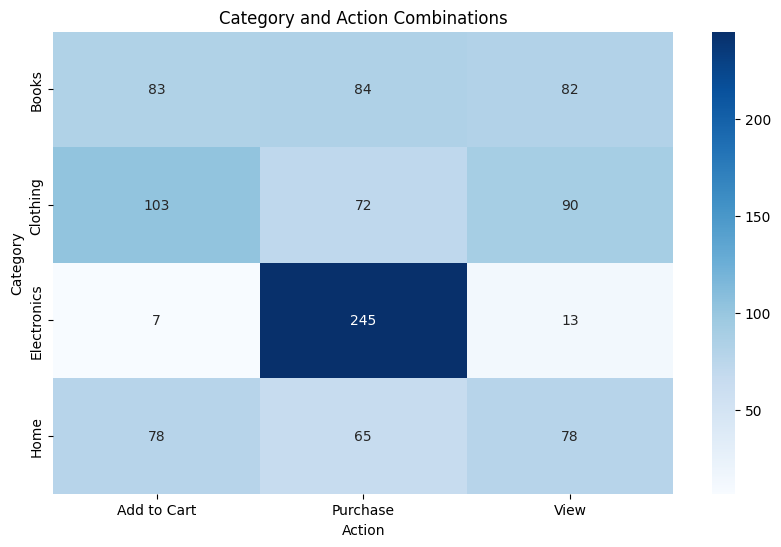

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each category and action combination
category_action_counts = ecommerce_raw.groupby(['Category', 'Action']).size().unstack(fill_value=0)

# Create a heatmap to visualize the combinations
plt.figure(figsize=(10, 6))
sns.heatmap(category_action_counts, cmap='Blues', annot=True, fmt='d', cbar=True)
plt.title('Category and Action Combinations')
plt.xlabel('Action')
plt.ylabel('Category')
plt.show()


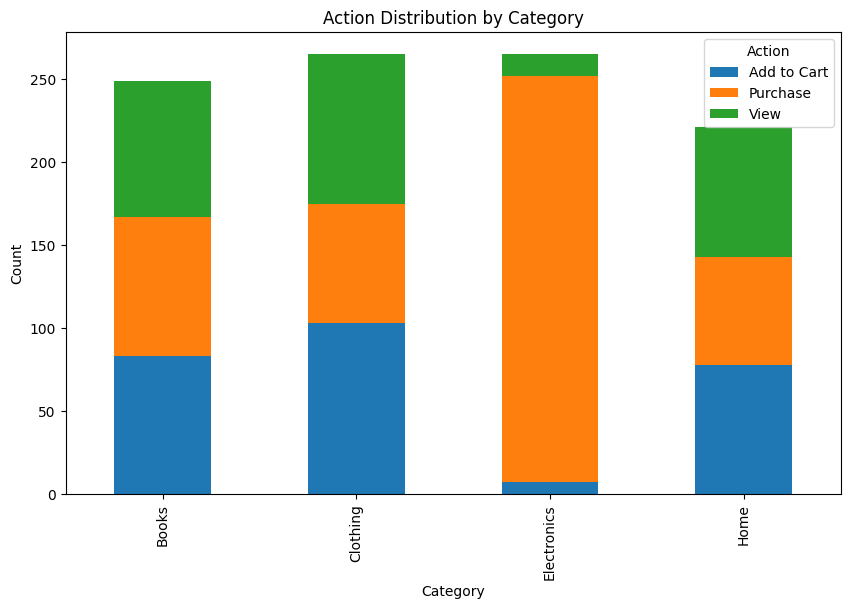

In [68]:
# Create a stacked bar chart to visualize the distribution of actions within each category
category_action_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Action Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Action', loc='upper right')
plt.show()

<ipython-input-71-166f8117ec9e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = ecommerce_raw.corr()


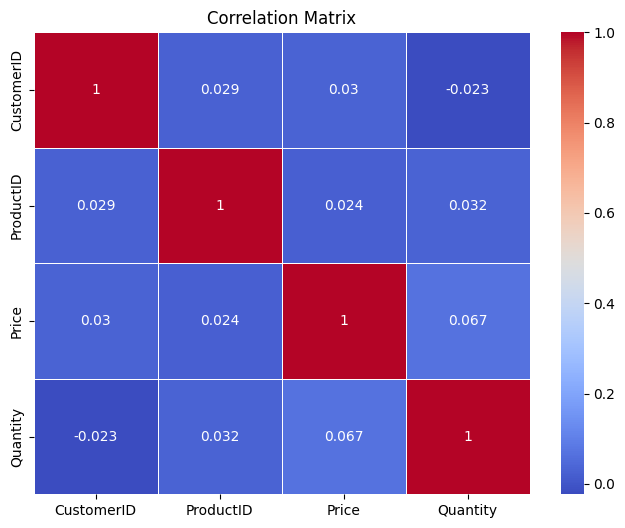

In [71]:
# Calculate the correlation matrix
correlation_matrix = ecommerce_raw.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [75]:
ecommerce_raw['Timestamp'] = pd.to_datetime(ecommerce_raw['Timestamp'])
ecommerce_raw.set_index('Timestamp', inplace=True)

In [118]:
time_e_com = ecommerce_raw
time_e_com['Timestamp'] = pd.to_datetime(ecommerce_raw['Timestamp'])

In [119]:
category_year_counts = time_e_com.groupby([time_e_com['Timestamp'].dt.year, 'Category', 'Action']).size().unstack(fill_value=0)


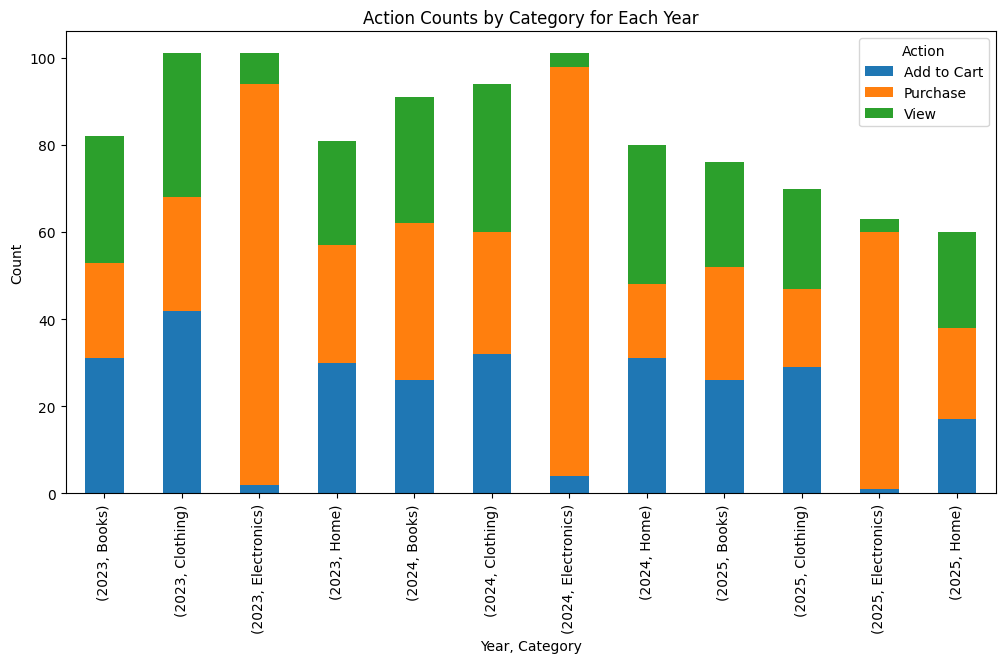

In [120]:
category_year_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Action Counts by Category for Each Year')
plt.xlabel('Year, Category')
plt.ylabel('Count')
plt.legend(title='Action', loc='upper right')
plt.show()

In [131]:
category_month_counts = ecommerce_raw.groupby([ecommerce_raw['Timestamp'].dt.year, ecommerce_raw['Timestamp'].dt.month, 'Category', 'Action']).size().unstack(fill_value=0)

In [141]:
category_month_counts.head(16)

Action                           Add to Cart  Purchase  View
Timestamp Timestamp Category                                
2023      1         Books                  4         4     1
                    Clothing               5         2     2
                    Electronics            0         8     0
                    Home                   1         1     3
          2         Books                  2         0     1
                    Clothing               6         3     1
                    Electronics            0        11     0
                    Home                   2         1     1
          3         Books                  1         1     2
                    Clothing               1         1     3
                    Electronics            0        13     1
                    Home                   2         3     3
          4         Books                  1         2     5
                    Clothing               3         2     4
                    Electronics            0         8     1
                    Home                   2         2     0

In [ ]:
# categories = ecommerce_raw['Category'].dropna().unique()

# for category in categories:
#   trend_data = category_month_counts[category].rolling(window=3).mean()  # Adjust the window size as needed
#   plt.plot(category_month_counts.index, trend_data, marker='o', label=f'Trend for {category}')




# plt.legend(loc='upper left')

# plt.show()